# Part 2: Support Vector Machine
 A. Load dataset

 B. Text preprocessing and cleaning:

 C. Train and intialise default SVM model, compare with and without stopwords with TFIDF.

 D. Optimise the higher accuracy SVM model

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

training_data = pd.read_csv('/content/drive/MyDrive/Dissertation-Coding part/datasets/Train.csv')

#check training data
print(training_data.head())


Mounted at /content/drive
                                                Text  Label
0  "Vision coverageVacation PayDisability insuran...      1
1  "- 115 EUR per week. We guarantee you: • Work ...      1
2  "language minimum proficiency level: • Diligen...      1
3  "the shift); Overtime is paid up to 125% more....      1
4  "be paid. The city is Munich. Immediate depart...      1


In [2]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2000 non-null   object
 1   Label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# B. Text preprocessing and cleaning:
- Define normalsied_text funtion:
- normalsied text (lowercase)
- remove numbers
- remove special characters and punctuation
- Tokenise text
- Stemming
- Lemmitisation


In [3]:
#install to use module
!pip install contractions

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import unicodedata
import nltk
import string
import contractions

#[1]
nltk.download('punkt')

# Build a text cleaning function
def clean_text(raw_text):
    # Convert UTF characters to a simple ASCII format
    def change_utf(text):
        #2
        #3
        text = unicodedata.normalize('NFKD', text)
        #to ASCII, ignore none ascii format
        text = text.encode('ascii', 'ignore').decode('ascii')
        return text

    #specify the text will change format to ascii for the next text cleanning step
    UTF_text = change_utf(raw_text)


    #Lower case
    normalised_text = UTF_text.lower()

    #Tokenization
    words = nltk.word_tokenize(normalised_text)

    #Remove punctuations & expand contractions
    words = [contractions.fix(word) for word in words if word not in string.punctuation]

    #Remove numbers and specific symbols
    words = [word for word in words if not word.isdigit() and word not in ['---', '...', '***', '``']]

    return words


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
training_data['cleaned_text_train'] = training_data['Text'].apply(clean_text)

#check
print(training_data['cleaned_text_train'].head())


0    [vision, coveragevacation, paydisability, insu...
1    [eur, per, week, we, guarantee, you, work, in,...
2    [language, minimum, proficiency, level, dilige...
3    [the, shift, overtime, is, paid, up, to, more,...
4    [be, paid, the, city, is, munich, immediate, d...
Name: cleaned_text_train, dtype: object


In [5]:
#Create a new DataFrame with only the cleaned text and labels, prepare for model training
cleaned_train_data = training_data[['cleaned_text_train', 'Label']]


# SVM
- remove stopwords & TFIDF


In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import re

# Tuning Hyperparameter:[4]
ref: https://stackabuse.com/understanding-svm-hyperparameters/
- **The C Hyperparameter:**
The C parameter is inversely proportional to the margin size, this means that the larger the value of C, the smaller the margin, and, conversely, the smaller the value of C, the larger the margin.

The C parameter can be used along with any kernel, it tells the algorithm how much to avoid misclassifying each training sample, due to that, it is also known as regularization. Our linear kernel SVM has used a C of 1.0, which is a large value and gives a smaller margin.

- **The Gamma Hyperparameter**
It is inversely proportional to its distance. The higher its value, the closest are the points that are considered for the decision boundary, and the lowest the gamma, the farther points are also considered for choosing the decision boundary.





ref: [5][6]
1. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
2. https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

 C/ Gamma/ Kernal:[7]
 ref: https://aqsa-qadir44.medium.com/tuning-parameters-of-svm-kernel-regularization-gamma-and-margin-5f2f6639121a
 ref: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

 - C: Influence Bias & Variance
 - Gamma:the inverse of the radius of influence of samples selected by the model as support vectors.


 - Kernal: The Kernal Trick- can help solve non-linear problem. (Flexibility, higher Accuracy and computational effciency, achive better result
[8]
1. Try rbf: Radical bias function: good for low dimension, dense data, where the SVM algorithm’s accuracy and performance may be enhanced by include additional features.
ref: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

  

In [7]:
from sklearn.svm import SVC

#Start the SVM model
svc = SVC()

#show the default parameters
print("Default parameters of SVC:")
print(svc.get_params())


Default parameters of SVC:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [8]:
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#Split the training data into train/test:
#Week10: theory and application
class Dataset:
    def __init__(self):
        self.X = None
        self.y = None
        self.V = None

#specify column
cleaned_train_data.columns = ['cleaned_text_train', 'Label']

#Convert textual columns to strings for TF-IDF vectorization
cleaned_train_data['cleaned_text_train'] = cleaned_train_data['cleaned_text_train'].astype(str)

# Prepare text and labels
X = cleaned_train_data['cleaned_text_train'].values  # Input text features
y = cleaned_train_data['Label'].values  # Corresponding labels

# Initialize train and test Dataset objects
train = Dataset()
test = Dataset()

#Splitting the data into training and testing sets(has tried combinations 0.2/0.3/0.4/0.5/0.6/0.7/0.8/0.9= did not change accuracies of training) will keep 0.2 here
train.X, test.X, train.y, test.y = split(X, y, test_size=0.20, random_state=123456789)

#Remove stop words&TFIDF  (here i specify> stop_words='english')
vectorizer_no_sw = TfidfVectorizer(stop_words='english')

#Vectorize the textual data(both train/test)
train.V = vectorizer_no_sw.fit_transform(train.X)
test.V = vectorizer_no_sw.transform(test.X)

#Define the parameters to search and their possible values: fix the combination issues (L1&lbfgs)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
}

#Initialize the SVM model # use GridSearchCV find the best parameters
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

#Fit the model on prepared training data
grid.fit(train.V, train.y)

#best svm model
svc_best_no_sw = grid.best_estimator_
#[9]
#predict on test data(from the split) to see performance
y_pred_no_sw = svc_best_no_sw.predict(test.V)

#test accuracy from the best SVM model
print("Best Model test accuracy:", accuracy_score(test.y, y_pred_no_sw))

#classification report and confusion matrix
print(classification_report(test.y, y_pred_no_sw))
print(confusion_matrix(test.y, y_pred_no_sw))


<ipython-input-8-e5c0f4ae33cf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_train_data['cleaned_text_train'] = cleaned_train_data['cleaned_text_train'].astype(str)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

In [9]:
import pandas as pd
#[10]
#load testing(unseen/unlabelled) data
unseen_test_data_path = '/content/drive/MyDrive/Dissertation-Coding part/datasets/Testing data (unseen:unlabelled).csv'
unseen_test_data = pd.read_csv(unseen_test_data_path)

#apply text preprocessing function defined before:(clean_text)
unseen_test_data['cleaned_text_unseen_test'] = unseen_test_data['Text'].apply(clean_text)

#convert to str for tfidf to read
unseen_test_data['cleaned_text_unseen_test'] = unseen_test_data['cleaned_text_unseen_test'].astype(str)

X_unseen_test_vec = vectorizer_no_sw.transform(unseen_test_data['cleaned_text_unseen_test'])

#Best tuned SVM Model for Prediction
final_unseen_test_predictions = svc_best_no_sw.predict(X_unseen_test_vec)

#generate the predicted label
unseen_test_data['Predicted_Label'] = final_unseen_test_predictions
print(unseen_test_data[['Text', 'Predicted_Label']].head())

unseen_test_data.to_csv('/content/drive/MyDrive/Dissertation-Coding part/datasets/predictions_on_unseen_test_SVM.csv', index=False)


                                                Text  Predicted_Label
0  "projects. The main function is the installati...                1
1  ""* Work in logistics ("WHISTL", "SAINSBURY'S"...                1
2  "speak English is a plus but not mandatory • M...                1
3  "a refrigerator, TV, kettle. EMERGENCY DEPARTU...                1
4  "in Germany is offered. Shipping and delivery ...                1


In [12]:
#count labels of the predicted label
countlabel= pd.read_csv('/content/drive/MyDrive/Dissertation-Coding part/datasets/predictions_on_unseen_test_SVM.csv')

#use: value_counts() function
#[11]
label_counts = countlabel['Predicted_Label'].value_counts()

print(label_counts)

Predicted_Label
0    1206
1    1194
Name: count, dtype: int64


#Comparasion:
ref: https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm

In [13]:
#[12]
model = svc_best_no_sw

from sklearn import metrics

preds = model.predict(test.V)
targs = test.y

print("accuracy: ", metrics.accuracy_score(targs, preds))
print("precision: ", metrics.precision_score(targs, preds, average='binary'))  # Specify average='binary' for binary classification
print("recall: ", metrics.recall_score(targs, preds, average='binary'))  # Specify average='binary' for binary classification
print("F1: ", metrics.f1_score(targs, preds, average='binary'))  # Specify average='binary' for binary classification
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))  # AUC assumes binary classification by default

train_preds = preds


accuracy:  1.0
precision:  1.0
recall:  1.0
F1:  1.0
area under curve (auc):  1.0


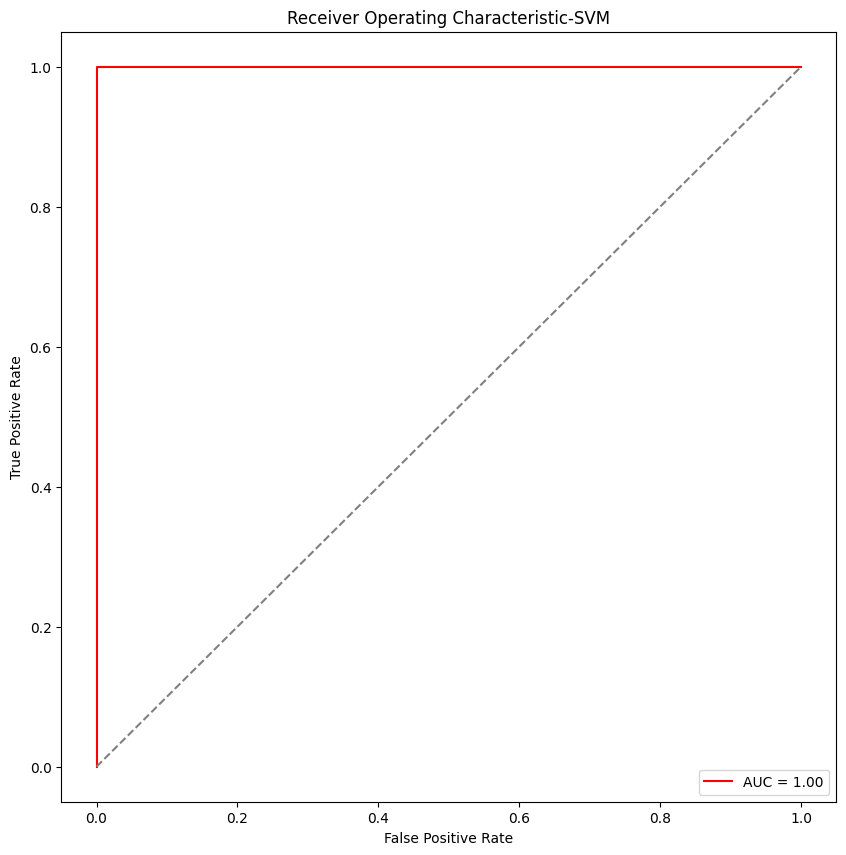

In [14]:
[13]
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, _ = roc_curve(targs, preds)
roc_auc = roc_auc_score(targs, preds)

# Plot ROC Curve
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic-SVM')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plotting the diagonal line for reference
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Text real-word data:

In [15]:
import pandas as pd
#[10]
#load testing(unseen/unlabelled) data
unseen_test_data_path = '/content/drive/MyDrive/Dissertation-Coding part/datasets/Text2 (unseen).csv'
unseen_test_data = pd.read_csv(unseen_test_data_path)

#apply text preprocessing function defined before:(clean_text)
unseen_test_data['cleaned_text_unseen_test'] = unseen_test_data['Text2'].apply(clean_text)

#convert to str for tfidf to read
unseen_test_data['cleaned_text_unseen_test'] = unseen_test_data['cleaned_text_unseen_test'].astype(str)

X_unseen_test_vec = vectorizer_no_sw.transform(unseen_test_data['cleaned_text_unseen_test'])

#Best tuned SVM Model for Prediction
final_unseen_test_predictions = svc_best_no_sw.predict(X_unseen_test_vec)

#generate the predicted label
unseen_test_data['Predicted_Label'] = final_unseen_test_predictions
print(unseen_test_data[['Text2', 'Predicted_Label']].head())

unseen_test_data.to_csv('/content/drive/MyDrive/Dissertation-Coding part/datasets/predictions_on_unseen_tes2t_SVM.csv', index=False)


                                               Text2  Predicted_Label
0  Nature of work\nWorkers wanted in Dutch wareho...                1
1  Nature of work\nWorking hours: three shifts: m...                1
2  Nature of work\nWe are looking for workers for...                1
3  Nature of work\nWe are looking for workers for...                1
4  Nature of work\nWe offer a job in Holland, in ...                1


Reference:
1.  https://stackoverflow.com/questions/37101114/what-to-download-in-order-to-make-nltk-tokenize-word-tokenize-work
2. https://docs.python.org/3/library/unicodedata.html
3. https://towardsdatascience.com/difference-between-nfd-nfc-nfkd-and-nfkc-explained-with-python-code-e2631f96ae6c
4. https://stackabuse.com/understanding-svm-hyperparameters/
5. https://www.geeksforgeeks.org/
6. https://www.kaggle.com/code/prashant111/svm-classifier-tutorial
7.https://aqsa-qadir44.medium.com/tuning-parameters-of-svm-kernel-regularization-gamma-and-margin-5f2f6639121a
 ref: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

8. https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

9. 	https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
10. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

11. https://www.w3resource.com/pandas/series/series-value_counts.php
12. https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
13.  https://www.kaggle.com/code/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison

